<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


https://archive.ics.uci.edu/ml/datasets/wine+quality

In [2]:
data = pd.read_csv('winequality-red.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


1.Разделите выборку на обучающую и тестовую в отношении 70%/30%

In [4]:
RANDOM_STATE = 42

X = data.iloc[:,:11]
X.head()

y = data.iloc[:,11]
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1119, 11), (480, 11), (1119,), (480,))

2.Оцените качество по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [6]:
dec_tree_cl = DecisionTreeClassifier(random_state=RANDOM_STATE)
dec_tree_cl.fit(X_train, y_train)
y_pred = dec_tree_cl.predict(X_test)
dec_tree_cl_score = accuracy_score(y_test, y_pred)
print (f'DecisionTreeClassifier accuracy: {dec_tree_cl_score}')


bag_cl = BaggingClassifier (base_estimator = None, n_estimators=100, random_state = RANDOM_STATE)
bag_cl.fit(X_train, y_train)
y_pred = bag_cl.predict(X_test)
bag_cl_score = accuracy_score(y_test, y_pred)
print (f'BaggingClassifier accuracy со 100 деревьями: {bag_cl_score}')


rand_for_cl = RandomForestClassifier (n_estimators=100, random_state = RANDOM_STATE)
rand_for_cl.fit(X_train, y_train)
y_pred = rand_for_cl.predict(X_test)
rand_for_cl_score = accuracy_score(y_test, y_pred)
print (f'RandomForestClassifier accuracy со 100 деревьями: {rand_for_cl_score}')


DecisionTreeClassifier accuracy: 0.5729166666666666
BaggingClassifier accuracy со 100 деревьями: 0.6416666666666667
RandomForestClassifier accuracy со 100 деревьями: 0.6541666666666667


In [ ]:
#Ансамбли деревьев показывают результат лучше


3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



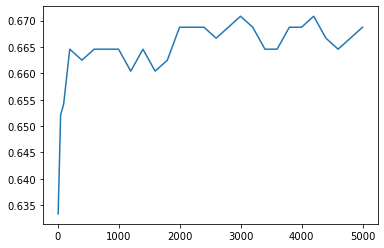

In [7]:
trees = [10, 50, 100] + list(range(200, 5001, 200))
accuracy = []

for tree in trees:
    rand_for_cl = RandomForestClassifier(n_estimators=tree, random_state=RANDOM_STATE)
    rand_for_cl.fit(X_train, y_train)
    y_pred = rand_for_cl.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    

plt.plot(trees, accuracy)

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [8]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [9]:
from sklearn.preprocessing import LabelEncoder
y_encoder = LabelEncoder()
y_enc = y_encoder.fit_transform(y)

In [10]:
import xgboost as xgb

grad_boost_cl = GradientBoostingClassifier (random_state = RANDOM_STATE)
grad_boost_cl_score = cross_val_score(grad_boost_cl, X, y_enc, scoring='accuracy')
print (f'accuracy по cross_val_score для GradientBoostingClassifier: {np.mean(grad_boost_cl_score)}')

xgb_cl = xgb.XGBClassifier(random_state = RANDOM_STATE)
xgb_cl_score = cross_val_score(xgb_cl, X, y_enc, scoring='accuracy', n_jobs=-1)
print (f'accuracy по cross_val_score для XGBClassifier: {np.mean(xgb_cl_score)}')

accuracy по cross_val_score для GradientBoostingClassifier: 0.5653467868338558
accuracy по cross_val_score для XGBClassifier: 0.5472335423197492


In [ ]:
#GradientBoostingClassifier показывает результат чуть лучше

5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy и скорость работы. Выведите лучшие параметры алгоритмов.

In [11]:
parameters = {'learning_rate': np.arange(0.1,0.21,0.05), 
              'n_estimators':np.arange(100,400,50),
              'max_depth': np.arange(1,5,1)
              }

In [12]:
search_gbc = GridSearchCV(estimator=GradientBoostingClassifier(random_state=RANDOM_STATE), param_grid=parameters, cv=3, scoring='accuracy', n_jobs=-1)
                      
search_xgb = GridSearchCV(estimator=XGBClassifier(random_state=RANDOM_STATE), param_grid=parameters, cv=3, scoring='accuracy', n_jobs=-1)

In [13]:
search_gbc.fit(X, y_enc)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.1 , 0.15, 0.2 ]),
                         'max_depth': array([1, 2, 3, 4]),
                         'n_estimators': array([100, 150, 200, 250, 300, 350])},
             scoring='accuracy')

In [14]:
print('Sklearn GBC:')
print(f'Accuracy: {search_gbc.best_score_:.4f}')
print(f'Parameters: {search_gbc.best_params_}')

Sklearn GBC:
Accuracy: 0.5679
Parameters: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}


In [15]:
search_xgb.fit(X, y_enc)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [16]:
print('XGBoost:')
print(f'Accuracy: {search_xgb.best_score_}')
print(f'Parameters: {search_xgb.best_params_}')

XGBoost:
Accuracy: 0.5753595997498436
Parameters: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}


6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [17]:
!pip install catboost
!pip install lightgbm
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [18]:
lgbc = LGBMClassifier(random_state=RANDOM_STATE)
cbc = CatBoostClassifier(random_state=RANDOM_STATE)

In [19]:
lgbc = LGBMClassifier(random_state=RANDOM_STATE)
cbc = CatBoostClassifier(random_state=RANDOM_STATE)

In [20]:
print('Light GBM:', np.mean(cross_val_score(lgbc, X, y_enc, scoring='accuracy', n_jobs=-1)))

Light GBM: 0.5572472570532915


In [21]:
print('Catboost Classifier:', np.mean(cross_val_score(cbc, X, y_enc, scoring='accuracy', n_jobs=-1)))

Catboost Classifier: 0.5516105015673981


In [ ]:
# Результат сравним с предыдущим экспериментом

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями. Выведите лучшие параметры алгоритмов.
Сравните значение метрики accuracy и скорость по этим четырем реализациям.

In [22]:
search_lgbc = GridSearchCV(estimator=LGBMClassifier(random_state=RANDOM_STATE), param_grid=parameters, cv=3, scoring='accuracy', n_jobs=-1)

search_cbc = GridSearchCV(estimator=CatBoostClassifier(random_state=RANDOM_STATE), param_grid=parameters, cv=3, scoring='accuracy', n_jobs=-1)

In [23]:
search_lgbc.fit(X, y_enc)

GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': array([0.1 , 0.15, 0.2 ]),
                         'max_depth': array([1, 2, 3, 4]),
                         'n_estimators': array([100, 150, 200, 250, 300, 350])},
             scoring='accuracy')

In [24]:
print('Sklearn GBC:')
print(f'Accuracy: {search_lgbc.best_score_}')
print(f'Parameters of a model: {search_lgbc.best_params_}')

Sklearn GBC:
Accuracy: 0.5747342088805504
Parameters of a model: {'learning_rate': 0.15000000000000002, 'max_depth': 1, 'n_estimators': 150}


In [25]:
search_cbc.fit(X, y_enc)

0:	learn: 1.6556733	total: 153ms	remaining: 22.9s
1:	learn: 1.5440517	total: 161ms	remaining: 11.9s
2:	learn: 1.4616349	total: 168ms	remaining: 8.23s
3:	learn: 1.3963264	total: 174ms	remaining: 6.35s
4:	learn: 1.3378606	total: 180ms	remaining: 5.23s
5:	learn: 1.2886238	total: 187ms	remaining: 4.48s
6:	learn: 1.2431099	total: 193ms	remaining: 3.94s
7:	learn: 1.2077018	total: 199ms	remaining: 3.53s
8:	learn: 1.1781483	total: 205ms	remaining: 3.2s
9:	learn: 1.1511237	total: 210ms	remaining: 2.94s
10:	learn: 1.1293391	total: 216ms	remaining: 2.73s
11:	learn: 1.1081278	total: 221ms	remaining: 2.54s
12:	learn: 1.0870086	total: 225ms	remaining: 2.37s
13:	learn: 1.0706132	total: 229ms	remaining: 2.22s
14:	learn: 1.0532669	total: 233ms	remaining: 2.09s
15:	learn: 1.0390274	total: 237ms	remaining: 1.98s
16:	learn: 1.0259614	total: 240ms	remaining: 1.88s
17:	learn: 1.0156779	total: 244ms	remaining: 1.79s
18:	learn: 1.0040875	total: 248ms	remaining: 1.71s
19:	learn: 0.9937662	total: 250ms	remainin

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002BDEA58D460>,
             n_jobs=-1,
             param_grid={'learning_rate': array([0.1 , 0.15, 0.2 ]),
                         'max_depth': array([1, 2, 3, 4]),
                         'n_estimators': array([100, 150, 200, 250, 300, 350])},
             scoring='accuracy')

In [26]:
print('Sklearn GBC:')
print(f'Accuracy: {search_cbc.best_score_}')
print(f'Parameters of a model: {search_cbc.best_params_}')

Sklearn GBC:
Accuracy: 0.58223889931207
Parameters of a model: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}


8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [27]:
!pip install optuna
import optuna

def objective(trial):

    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 400),
        'max_depth': trial.suggest_int('max_depth', 1, 5),
        'random_state': 42
    }

    xgb_optuna = xgb.XGBClassifier(**params)
    scores = cross_val_score(xgb_optuna, X, y_enc, scoring='accuracy')

    xgb_optuna.fit(X, y_enc)
    y_pred = xgb_optuna.predict(X_test)
    opt_accuracy = accuracy_score(y_test, y_pred)

    return scores.mean()



study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=100)

[I 2022-11-23 12:13:34,097] A new study created in memory with name: no-name-5a5aab2c-e931-41a1-8ba3-4cf10c6e2469
[I 2022-11-23 12:13:36,953] Trial 0 finished with value: 0.544075235109718 and parameters: {'learning_rate': 0.24439743988620333, 'n_estimators': 230, 'max_depth': 3}. Best is trial 0 with value: 0.544075235109718.
[I 2022-11-23 12:13:42,761] Trial 1 finished with value: 0.5778585423197493 and parameters: {'learning_rate': 0.02035926864968143, 'n_estimators': 276, 'max_depth': 5}. Best is trial 1 with value: 0.5778585423197493.
[I 2022-11-23 12:13:45,233] Trial 2 finished with value: 0.5447217868338559 and parameters: {'learning_rate': 0.3656625359589791, 'n_estimators': 159, 'max_depth': 4}. Best is trial 1 with value: 0.5778585423197493.
[I 2022-11-23 12:13:48,209] Trial 3 finished with value: 0.512823275862069 and parameters: {'learning_rate': 0.6098658120771768, 'n_estimators': 275, 'max_depth': 3}. Best is trial 1 with value: 0.5778585423197493.
[I 2022-11-23 12:13:48,

[I 2022-11-23 12:15:15,843] Trial 35 finished with value: 0.5816222570532915 and parameters: {'learning_rate': 0.011894373402076238, 'n_estimators': 168, 'max_depth': 4}. Best is trial 17 with value: 0.5922335423197492.
[I 2022-11-23 12:15:19,405] Trial 36 finished with value: 0.5678487460815047 and parameters: {'learning_rate': 0.056702917370718996, 'n_estimators': 196, 'max_depth': 5}. Best is trial 17 with value: 0.5922335423197492.
[I 2022-11-23 12:15:22,704] Trial 37 finished with value: 0.5265869905956113 and parameters: {'learning_rate': 0.600718365582122, 'n_estimators': 266, 'max_depth': 4}. Best is trial 17 with value: 0.5922335423197492.
[I 2022-11-23 12:15:24,467] Trial 38 finished with value: 0.5590869905956113 and parameters: {'learning_rate': 0.20945082381476057, 'n_estimators': 147, 'max_depth': 3}. Best is trial 17 with value: 0.5922335423197492.
[I 2022-11-23 12:15:28,692] Trial 39 finished with value: 0.5415928683385579 and parameters: {'learning_rate': 0.12764363044

[I 2022-11-23 12:17:07,546] Trial 71 finished with value: 0.5810011755485893 and parameters: {'learning_rate': 0.014255136713755353, 'n_estimators': 119, 'max_depth': 4}. Best is trial 47 with value: 0.5922433385579937.
[I 2022-11-23 12:17:08,947] Trial 72 finished with value: 0.5822550940438871 and parameters: {'learning_rate': 0.012182302181959526, 'n_estimators': 85, 'max_depth': 4}. Best is trial 47 with value: 0.5922433385579937.
[I 2022-11-23 12:17:11,915] Trial 73 finished with value: 0.562864420062696 and parameters: {'learning_rate': 0.06799128829791849, 'n_estimators': 192, 'max_depth': 4}. Best is trial 47 with value: 0.5922433385579937.
[I 2022-11-23 12:17:16,354] Trial 74 finished with value: 0.5697315830721003 and parameters: {'learning_rate': 0.039399531489512835, 'n_estimators': 232, 'max_depth': 5}. Best is trial 47 with value: 0.5922433385579937.
[I 2022-11-23 12:17:18,617] Trial 75 finished with value: 0.5616065830721003 and parameters: {'learning_rate': 0.1121561879

In [28]:
print (f'Best value: {study.best_value}')
print (f'Best params: {study.best_params}')


Best value: 0.5922433385579937
Best params: {'learning_rate': 0.012125101257635551, 'n_estimators': 216, 'max_depth': 5}


In [ ]:
#Результат по accuracy удалось улучшить

9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [29]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('grad_boost_cl', GradientBoostingClassifier(random_state=RANDOM_STATE)),
    ('xgb_cl', XGBClassifier(random_state=RANDOM_STATE)),
    ('lgbc', LGBMClassifier(random_state=RANDOM_STATE)),
    ('cbc', CatBoostClassifier(random_state=RANDOM_STATE, logging_level='Silent'))
]
clf = StackingClassifier(estimators=estimators)

In [35]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('grad_boost_cl',
                                GradientBoostingClassifier(max_depth=1,
                                                           random_state=42)),
                               ('xgb_cl',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None...
                                              max_delta_step=No

In [31]:
print(f'Stacking accuracy: {clf.score(X_test, y_test)}')

Stacking accuracy: 0.6770833333333334


10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [32]:
estimators = [
    ('grad_boost_cl', GradientBoostingClassifier(**search_gbc.best_params_, random_state=RANDOM_STATE)),
    ('xgb_cl', XGBClassifier(**search_xgb.best_params_, random_state=RANDOM_STATE)),
    ('lgbc', LGBMClassifier(**search_lgbc.best_params_, random_state=RANDOM_STATE)),
    ('cbc', CatBoostClassifier(**search_cbc.best_params_, random_state=RANDOM_STATE, logging_level='Silent'))
]
clf = StackingClassifier(estimators=estimators)

In [33]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('grad_boost_cl',
                                GradientBoostingClassifier(max_depth=1,
                                                           random_state=42)),
                               ('xgb_cl',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None...
                                              max_delta_step=No

In [34]:
print(f'Stacking accuracy: {clf.score(X_test, y_test)}')

Stacking accuracy: 0.5916666666666667


In [ ]:
#Stacking c базовыми параметрами дал лучший результат